In [1]:
import yfinance as yf
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.graph_objs as go

In [8]:
azn = yf.Ticker("AZN.L")
hist = azn.history(period="1y")

print(hist.head())

                                   Open          High           Low  \
Date                                                                  
2023-09-20 00:00:00+01:00  10560.369693  10714.978516  10511.442851   
2023-09-21 00:00:00+01:00  10669.966203  10841.210158  10652.352539   
2023-09-22 00:00:00+01:00  10675.837923  10949.828263  10654.310110   
2023-09-25 00:00:00+01:00  10898.943149  11018.324641  10806.960687   
2023-09-26 00:00:00+01:00  10916.557447  11020.282357  10881.330119   

                                  Close   Volume  Dividends  Stock Splits  
Date                                                                       
2023-09-20 00:00:00+01:00  10714.978516  1568781        0.0           0.0  
2023-09-21 00:00:00+01:00  10652.352539  5277686        0.0           0.0  
2023-09-22 00:00:00+01:00  10808.918945  3547059        0.0           0.0  
2023-09-25 00:00:00+01:00  10953.741211  3471175        0.0           0.0  
2023-09-26 00:00:00+01:00  10924.385742  16068

In [17]:
df_azn = pd.DataFrame(hist)
df_azn_clean = df_azn.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
df_azn_clean.head()

,Close
Date,
2023-09-20 00:00:00+01:00,10714.978516
2023-09-21 00:00:00+01:00,10652.352539
2023-09-22 00:00:00+01:00,10808.918945
2023-09-25 00:00:00+01:00,10953.741211
2023-09-26 00:00:00+01:00,10924.385742


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

<Axes: xlabel='Date', ylabel='Close'>

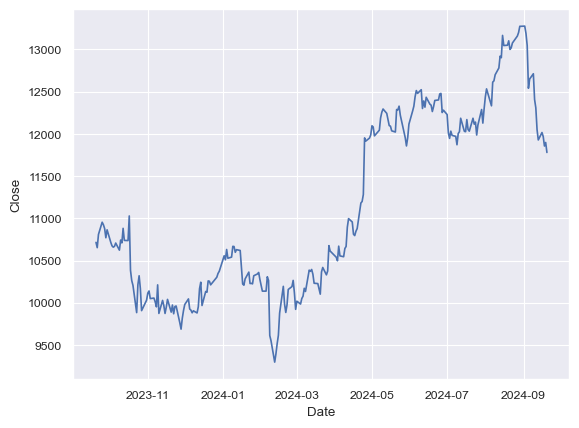

In [22]:
sns.set_theme("paper")
sns.lineplot(data=df_azn_clean, x="Date", y="Close")

In [2]:
def current_multiple_comparison(*tickers):
    tickers_array = []
    for ticker in tickers:
        tickers_array.append(ticker)    

    valuation_data = {}

    for ticker in tickers_array:
        stock = yf.Ticker(ticker)
        info = stock.info

        pe_ratio = info.get('forwardPE', None)
        pb_ratio = info.get('priceToBook', None) 
        eps = info.get('trailingEps', None) 
        ps_ratio = info.get('priceToSalesTrailing12Months', None)
        dividend_yield = (info.get('dividendYield', None))*100
    
        currency = info.get("currency")
        if currency == 'GBp':
            pe_ratio /= 100
            pb_ratio /= 100

        valuation_data[ticker] = {
            'P/E Ratio': pe_ratio,
            'P/B Ratio': pb_ratio,
            'EPS': eps,
            'P/S Ratio': ps_ratio,
            'Dividend Yield %': dividend_yield
        }

    for ticker, metrics in valuation_data.items():
        print(f"\nValuation metrics for {ticker}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")

In [3]:
current_multiple_comparison("AZN.L", "GSK.L", "SN.L")


Valuation metrics for AZN.L:
P/E Ratio: 16.293223
P/B Ratio: 4.621057400000001
EPS: 3.1
P/S Ratio: 3.7169352
Dividend Yield %: 1.9800000000000002

Valuation metrics for GSK.L:
P/E Ratio: 9.1428577
P/B Ratio: 4.3599207
EPS: 1.13
P/S Ratio: 1.9923941
Dividend Yield %: 3.9100002000000003

Valuation metrics for SN.L:
P/E Ratio: 13.529412
P/B Ratio: 1.929854
EPS: 0.26
P/S Ratio: 1.777329
Dividend Yield %: 2.5799999000000002


In [4]:
def fetch_full_history(tickers):
    data = pd.DataFrame()

    for ticker in tickers:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="max")
        data[ticker] = hist['Close']
    
    return data

def plot_interactive_chart(data, tickers):
    fig = go.Figure()

    for ticker in tickers:
        fig.add_trace(go.Scatter(x=data.index, y=data[ticker], mode='lines', name=ticker))

    fig.update_layout(
        title="Stock Price Comparison (Full History)",
        xaxis_title="Date",
        yaxis_title="Price (Adjusted Close)",
        hovermode="x",
        xaxis_rangeslider_visible=True, 
        template="plotly_white"
    )

    fig.show()

tickers = ["AAPL", "MSFT", "GOOGL"]

data = fetch_full_history(tickers)

plot_interactive_chart(data, tickers)

In [ ]:

def get_stocks_in_sector(sector):


In [48]:
#director moves 

5.10.4
